<a href="https://colab.research.google.com/github/Carlosmagnobrusil/CarlosBrusil_projects/blob/main/Tarea_semana_4_CB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deber semana 4**
## *Creado por: Carlos Brusil*



*   Fecha de Creación: 2 de febrero de 2023 
*   Fechad de actualización: 2 de febrero de 2023 
*   Descripción: Intervalo de confianza y prueba de hipótesis para la diferencia de medias


- La empresa Stats Health está desarrollando un análisis de [usabilidad](https://en.wikipedia.org/wiki/Usability) de un nuevo sistema informático de tele-rehabilitación para pacientes de artroplastia de cadera.
  - Vea: https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8606428

- Stats Health ha recopilado un dataset acerca de la usabilidad de la interfaz del sistema que contiene:
  - Variables de uso de la aplicación: **Time**, y la escala de usabilidad dada por el usuario: **SUS**.
  - Variables demográficas del usuario, Género (**Gender**), Edad (**Age**), entre otras.

### Problema: Stats Health

In [1]:
import pandas as pd #importo la libreria panda permite manipular y molderar los datos 
import numpy as np #importo la libreria numpy manipular y molderar los datos 
import matplotlib.pyplot as plt #importo libreria matplotlib que es una libreria que me permite realizar graficas en 2 dimensiones de de mis datos
import seaborn as sns #Esta libreria nos permite modificar la vizualizacion de los datos atraves de los coleres y mejorar presetancion de los mismo 

In [2]:
sh_df = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/UX_data.csv") #llamo a la base desde un repositorio de Github
sh_df.head()

,SUS,Time,ID,Gender,Age,Kinect,NUI,Games
0,42.5,179.3,student,M,twenty,high,average,high
1,92.5,153.3,student,M,twenty,high,high,high
2,95.0,135.7,student,M,twenty,average,average,high
3,92.5,148.3,student,F,twenty,average,high,high
4,80.0,148.0,student,M,twenty,average,average,high


In [3]:
sh_df.describe()

,SUS,Time
count,30.000000,30.000000
mean,76.083333,157.500000
std,14.616997,22.399415
min,40.000000,112.700000
25%,68.125000,140.025000
50%,78.750000,159.700000
75%,87.500000,177.050000
max,95.000000,188.300000


In [4]:
#Obtengo informacion de mi data frame 
sh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SUS     30 non-null     float64
 1   Time    30 non-null     float64
 2   ID      30 non-null     object 
 3   Gender  30 non-null     object 
 4   Age     30 non-null     object 
 5   Kinect  30 non-null     object 
 6   NUI     30 non-null     object 
 7   Games   30 non-null     object 
dtypes: float64(2), object(6)
memory usage: 2.0+ KB


### 1.Escriba el código Python para construir un diagrama de cajas que muestre el género (**Gender**) en $x$ y el tiempo de ejecución de la tarea (**Time**) en $y$.
  - **Discuta:** Observa diferencia en el tiempo de ejecución de la tarea en sistema (Time) realizada por los usuarios de acuerdo al género (Gender). Realice el análisis con respecto a la información mostrada en el diagrama de cajas (resumen de 5 puntos, posición (de los cuartiles), dispersión (IQR, bigotes), etc.).

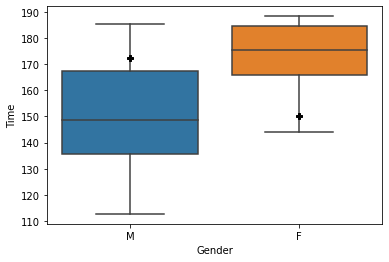

In [5]:
sns.boxplot(data=sh_df, x="Gender", y="Time")
plt.plot(sh_df.groupby("Gender").mean()['Time'], 'Pk')

##### Para entender de mejor manera el grafico debemos destacar primero que la disperción donde vemos que los datos se encuentran mas cercano cuando hablamos del tiempo de ejecución de las mujeres pero tambien bemos que la mediana de su tiempo es mayor que el de los hombres,sin embargo, vemos que el promedio de la repuesta de los hombres ees menos. Otro punto a observar es que los rangos interquartiles que presentan en la grafica son mas grandes dentro de los hombres loq ue indiaca que los valores mínimo y máximo tienen una mayor distancia razoin por la cual se podria entender que el promedio se menor en hombres que en mujeres.  

### 2. Escriba el código Python para construir un diagrama de líneas con barras de error (CI: 0.95) que muestre el género (**Gender**) en $x$ y el tiempo de ejecución de la tarea (**Time**) en $y$.

  - **Discuta:** Observa diferencia en el tiempo de ejecución de la tarea en sistema (Time) por los usuarios de acuerdo al género (Gender). 

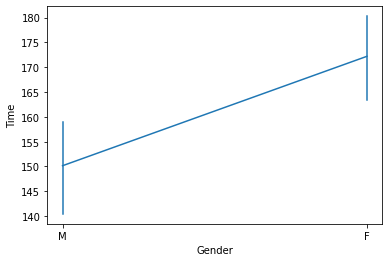

In [6]:
sns.lineplot(data= sh_df, x="Gender", y="Time", err_style="bars", ci=95, estimator='mean')

#### Cuando observamos este grafico podemos reafirmar dos comentarios de la linea anterior donde observamos que el intervalo de confianza de los hombres es mas grande esto se debe a la disperción de los datos, tambien prodiamos decir que el tiempo de respuesta es mayor cuando hablamos del género femenino, sin embargo como vimos en la parte superior esto nos podria hacer caer el la ilusion de los promedios.

### 4. Realice una prueba de dos varianzas para los grupos masculino y femenino (**Gender**). 
  - Escriba (reutilce) el código Python.
  - **Discuta** los resultados. 

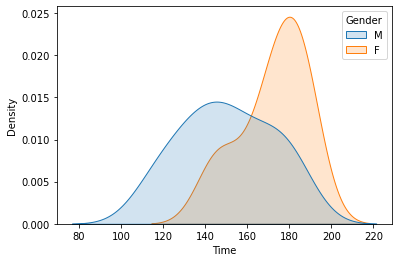

In [7]:
sns.kdeplot(data=sh_df, x='Time', hue='Gender', fill=True, common_norm=False, alpha=0.2)

#### En la presente gráfica podemos observar que la distribucion de los hombre se acerca mas a una distribución normal ya que las colas no se van con mayor varha y se obseva una campana mas estructurada mientras que la distribucion de los tiempos de respuesta de las mujeres se observa que existe una mayor carga en su cola dizquirda por lo cual podriamos decir que presenta un sego.

### 5. A partir de la prueba anterior realice una prueba de diferencias de medias para los grupos masculino y femenino (**Gender**).
  - Escriba (reutilce) el código Python.
  - **Discuta** los resultados. 

In [8]:
timem= sh_df.query('Gender == "M"')['Time']
timef = sh_df.query('Gender == "F"')['Time']

timem.describe(), timef.describe()

(count     20.000000
 mean     150.155000
 std       21.893582
 min      112.700000
 25%      135.600000
 50%      148.650000
 75%      167.300000
 max      185.300000
 Name: Time, dtype: float64, count     10.000000
 mean     172.190000
 std       15.656341
 min      144.000000
 25%      165.975000
 50%      175.500000
 75%      184.750000
 max      188.300000
 Name: Time, dtype: float64)

In [11]:
# importamos distribución F
from scipy.stats import f

def f_test(*args, alpha=0.05, alternative='two-sided'):
    # *args: array o lista
    if len(args) == 2:
        x = np.array(args[0])
        y = np.array(args[1])
        dfx = x.size-1  # define grados de libertad del numerador 
        dfy = y.size-1  # define grados de libertad del denominador 
        fp = np.var(x, ddof=1)/np.var(y, ddof=1)  # calcula F test statistic 
    # *args: varianzas
    else:
        fp = args[0] / args[1]  # calcula F test statistic
        nx = args[2]
        ny = args[3]
        dfx = nx-1  # define grados de libertad del numerador
        dfy = ny-1  # define grados de libertad del denominador 
    
    alpha_c = alpha
    if alternative=='two-sided': alpha_c = alpha_c / 2
    f_critical = f.ppf(alpha_c, dfx, dfy), f.ppf(1-alpha_c, dfx, dfy)
    f_areas = f.cdf(fp, dfx, dfy), 1-f.cdf(fp, dfx, dfy)  # areas colas
    
    colas = {'less': {'p-value': f_areas[0], "f-value": f_critical[0]}, 
             'greater': {'p-value': f_areas[1], "f-value": f_critical[1]},
             'two-sided': {'p-value': min(f_areas)*2, "f-value": f_critical}
            }
    return {"F-test result": {"statistic": fp, 
                       "p-value": colas[alternative]['p-value']},
                       "f-value": colas[alternative]['f-value'],
                       "alpha": alpha}

f_test(timem, timef)

{'F-test result': {'statistic': 1.9554788086399444,
  'p-value': 0.3032106717119911},
 'f-value': (0.34721594741232176, 3.6833380832180525),
 'alpha': 0.05}

#### Al revisar el p-value es mayor a nuestro alpha por lo cual aceptamos nuestra hipotesis que me indica mis varianzas son iguales 

In [10]:
from scipy.stats import ttest_ind

meanm = timem.mean()
meanf = timef.mean()
ttest_ind(timem, timef, 
          equal_var=True, alternative='two-sided'), "Diferencia", meanm - meanf

(Ttest_indResult(statistic=-2.8304210808891264, pvalue=0.00850683391306472),
 'Diferencia',
 -22.034999999999968)

#### La diferencia una vez asumido las varianxzas iguale spodemos entender que el valor medio del tiempo de respuesta en el programa por parte de los hombres es menor en 22.034 que el tiempo de respuesta de las mujeres 